In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("proj2a.ipynb")

# Project 2A: Spam/Ham Classification

## Feature Engineering, Logistic Regression
## Due Date: Thursday April 21, 11:59PM PDT

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
You will use what you've learned in class to create a classifier that can distinguish spam (junk or commercial or bulk) emails from ham (non-spam) emails. In addition to providing some skeleton code to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

After this homework, you should feel comfortable with the following:

- Feature engineering with text data
- Using `sklearn` libraries to process data and fit models
- Validating the performance of your model and minimizing overfitting
- Generating and analyzing precision-recall curves

This first part of the project focuses on initial analysis. In the second part of this project (to be released next week),  you will build your own spam/ham classifier.

## Warning
This is a **real world** dataset – the emails you are trying to classify are actual spam and legitimate emails. As a result, some of the spam emails may be in poor taste or be considered inappropriate. We think the benefit of working with realistic data outweighs these innapropriate emails, and wanted to give a warning at the beginning of the homework so that you are made aware.

In [2]:
# Run this cell to suppress all FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# more readable exceptions
%pip install --quiet iwut
%load_ext iwut
%wut on

Note: you may need to restart the kernel to use updated packages.


## Score Breakdown
Question | Points
--- | ---
1 | 2
2 | 3
3 | 3
4 | 2
5 | 2
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
Total | 22

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Initial Analysis

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### Loading in the Data

In email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset is from [SpamAssassin](https://spamassassin.apache.org/old/publiccorpus/). It consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the unlabeled test set contains 1000 unlabeled examples.

Note: The dataset is from 2004, so the contents of emails might be very different from those in 2022.

Run the following cells to load the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails and submit your predictions to the autograder for evaluation.

In [4]:
import zipfile
with zipfile.ZipFile('spam_ham_data.zip') as item:
    item.extractall()

In [5]:
original_training_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


First, let's check if our data contains any missing values. We have filled in the cell below to print the number of NaN values in each column. If there are NaN values, we replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns will be replaced with empty strings). Finally, we print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

In [6]:
print('Before imputation:')
print(original_training_data.isnull().sum())
original_training_data = original_training_data.fillna('')
print('------------')
print('After imputation:')
print(original_training_data.isnull().sum())

Before imputation:
id         0
subject    6
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 1

In the cell below, we have printed the text of the `email` field for the first ham and the first spam email in the original training set.

In [14]:
#first_ham = original_training_data.loc[original_training_data['spam'] == 0, 'email'].iloc[0]
first_spam = original_training_data.loc[original_training_data['spam'] == 1, 'email'].iloc[24]
#print(first_ham)
print(first_spam)

this is a multi-part message in mime format.
 
 ------=_nextpart_000_295635_01c23c9d.8d2947a0
 content-type: text/plain;
 	charset="windows-1252"
 content-transfer-encoding: quoted-printable
 
  when we say free turnkey selling system we mean free!
 =20
  get your demo disc today!=0a=
 no place to fly to, no meetings to attend!=09
 total turnkey system!	 high quality leads from
 proven mail houses!	 attractive invitations with a=20
 2-3% average response!	=20
 toll-free reservation hotline for seminar attendees!	 nationally
 tested - compliance approved materials!	 professional, entertaining &
 informative powerpoint presentations!	=20
 free multi-media loaner equipment including=20
 lap-top & projector!	 two fool proof appointment systems ? 50%
 response ratio!	 free full two days of complete training!	=20
 continuous coaching from
 experienced seminar presenters!	 attendance at your seminars by your own
 seminar coach!	 large range of top companies & products to work with!
 
 no comm

<!-- BEGIN QUESTION -->

Discuss one thing you notice that is different between the two emails that might relate to the identification of spam.

<!--
BEGIN QUESTION
name: q1
manual: True
points: 2
-->

The ham seems to have much clearer text and is formatted neatly.  For the spam, it seems disorganized and there are a lot of formatting (html) and punctuation additions that make the text and purpose of the email hard to read.

<!-- END QUESTION -->



## Training-Validation Split
The training data we downloaded is all the data we have available for both training models and **validating** the models that we train.  We therefore need to split the training data into separate training and validation datsets.  You will need this **validation data** to assess the performance of your classifier once you are finished training. Note that we set the seed (`random_state`) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. **Do not modify this random seed in the following questions, as our tests depend on it.**

In [8]:
# This creates a 90/10 train-validation split on our labeled data

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size = 0.1, random_state = 42)

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 2: Basic Feature Engineering

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. Recall that to train a logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails. We'll guide you through creating a simple feature, and you'll create more interesting ones as you try to increase the accuracy of your model.

<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 2

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

*The provided tests make sure that your function works correctly, so that you can use it for future questions.*

<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [9]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = []
    for text in texts:
        temp_arr = []
        for word in words:
            if word in text:
                temp_arr.append(1)
            else:
                temp_arr.append(0)
        indicator_array.append(temp_arr)
                
    
    return indicator_array

In [10]:
grader.check("q2")

q2 results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Basic EDA

We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.


The following plot (which was created using `sns.barplot`) compares the proportion of emails in each class containing a particular set of words. 

![training conditional proportions](images/training_conditional_proportions.png)

You can use DataFrame's `.melt` method to "unpivot" a DataFrame. See the following code cell for an example.

In [11]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column."))
display(df.melt("type"))

> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column.

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


<!-- BEGIN QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 3

Create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. Choose a set of words that are different from the ones above, but also have different proportions for the two classes. Make sure to only consider emails from `train`.

<!--
BEGIN QUESTION
name: q3
manual: True
format: image
points: 3
-->

(0.0, 1.0)

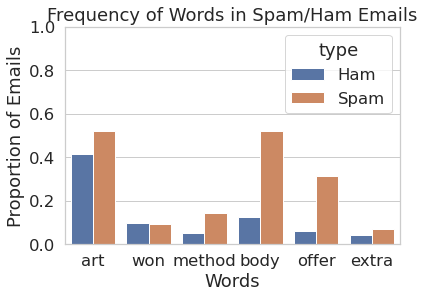

In [12]:
train = train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts

words = ['art', 'won', 'method', 'body', 'offer', 'extra']
df = pd.DataFrame(words_in_texts(words, train['email']))
df['type'] = train['spam']

df.columns = words + ['type']

df['type'].replace(0, 'Ham', inplace=True)
df['type'].replace(1, 'Spam', inplace=True)

df = df.melt('type')
sns.barplot(x='variable', y='value', data=df, hue='type', ci = None)

plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title("Frequency of Words in Spam/Ham Emails")
plt.ylim(0, 1)


<!-- END QUESTION -->



When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes. 

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 3: Basic Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`Y_train` should be a vector of the correct labels for each email in the training set.

*The provided tests check that the dimensions of your feature matrix (X) are correct, and that your features and labels are binary (i.e. consists of only 0's and 1's). It does not check that your function is correct; that was verified in a previous question.*
<!--
BEGIN QUESTION
name: q4
points: 2
-->

In [13]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = np.array(words_in_texts(some_words, train['email']))
Y_train = train['spam'].array

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 <PandasArray>
 [0, 0, 0, 0, 0]
 Length: 5, dtype: int64)

In [14]:
grader.check("q4")

q4 results: All test cases passed!

<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 5

Now that we have matrices, we can build a model with `scikit-learn`! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`. Then, output the model's training accuracy below. You should get an accuracy of around $0.75$

*The provided test checks that you initialized your logistic regression model correctly.*

<!--
BEGIN QUESTION
name: q5
points: 2
-->

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [16]:
grader.check("q5")

q5 results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 4: Evaluating Classifiers

That doesn't seem too shabby! But the classifier you made above isn't as good as the accuracy would make you believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure. Accuracy on the training set doesn't always translate to accuracy in the real world (on the test set). In future parts of this analysis, we will hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

To be clear, we label spam emails as 1 and ham emails as 0. These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The below graphic (modified slightly from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)) may help you understand precision and recall visually:
![precision_recall](images/precision_recall.png)

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

<br/>

<hr style="border: 1px solid #fdb515;" />

### Question 6

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (feel free to hard code your answers for this part):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [17]:
zero_predictor_fp = 0
zero_predictor_fn = len(train.loc[train['spam'] == 1])
zero_predictor_fp, zero_predictor_fn

(0, 1918)

In [18]:
grader.check("q6a")

q6a results: All test cases passed!

<br/>

---

### Question 6b

What is the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [19]:
tp = 0
fn = len(train.loc[(train['spam'] == 1)])

zero_predictor_acc = len(train.loc[train['spam'] == 0])/ len(train['spam'])
zero_predictor_recall = tp / (tp + fn)
zero_predictor_acc, zero_predictor_recall

(0.7447091707706642, 0.0)

In [20]:
grader.check("q6b")

q6b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/>

---

### Question 6c

Comment on the results from 6a and 6b. For **each** of FP, FN, accuracy, and recall, briefly explain why we see the result that we do.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->

FP = 0 since we predicted all ham, or that there was no spam (all negatives/0's).  Since we didn't choose spam once, there were 0 occurences of false positive.

FN = 1918, or the number of rows in train that had the spam column = 1, or were actually spam.  Since we predicted all 0's, the occurences of false negatives are when the row is actually a spam email, when we actually predicted it to be ham.

Accuracy = 0.745, which is the number of rows in train we predicted correctly/the total rows in the dataframe. We predict correct when a row is actually 0 or is ham, since we predicted ham for every single entry.  

Recall = 0.  TP = 0 since we don't predict a single entry to be spam (1).  Since the formula is tp/ (tp + fn), we get a recall of 0.

<!-- END QUESTION -->

<br/>

---

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Question 5. Do **NOT** use any `sklearn` functions, with the exception of the `.predict` method of your model object.

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [21]:
p = model.predict(X_train) #predictions
t = train['spam'].array

TP = 0  # p has a 1, and train has 1
TN = 0  # p has a 0, and train has 0
FP = 0  # p has a 1, and train has 0
FN = 0  # p has a 0, and train has 1

for i in range (len(p)):
    if ((p[i] == 1) & (t[i] == 1)):
        TP += 1
        
for i in range (len(p)):
    if ((p[i] == 0) & (t[i] == 0)):
        TN += 1
        
for i in range (len(p)):
    if ((p[i] == 1) & (t[i] == 0)):
        FP += 1

for i in range (len(p)):
    if ((p[i] == 0) & (t[i] == 1)):
        FN += 1


logistic_predictor_precision = TP /(TP + FP) 
logistic_predictor_recall = TP / (TP + FN)
logistic_predictor_far = FP /(FP + TN)

logistic_predictor_precision, logistic_predictor_recall, logistic_predictor_far, FP, FN

(0.6422287390029325, 0.11418143899895725, 0.021805183199285077, 122, 1699)

In [22]:
grader.check("q6d")

q6d results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/>

---

### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Question 5?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->

There are more false negatives when using the logistic regression classifier.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br/>

---

### Question 6f

1. Our logistic regression classifier got 75.76% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->

1.  It has a slightly higher accuracy (75.76%) compared to predicting 0 for every email (74.4%).

2.  One reason is that the words that are not individually distinctive to either spam or ham/ the words might be common in both types of emails.  The spam to ham ratio isn't high enough to make a clear, reliable distinction.

3. I would rather have the logistic regression classifier.  Predicting every email as a 0/ham is useless and defeats the purpose of the classifier, as our main goal is to find and get rid of a majority of spam emails.  Recall for the zero classifier is 0 and the logistic one is 0.11.

<!-- END QUESTION -->



<br/><br/>

## Congratulations! You have finished Project 2A!

In Project 2B, you will focus on building a spam/ham email classifier with logistic regression. You will be well-prepared to build such a model: you have considered what is in this data set, what it can be used for, and engineered some features that should be useful for prediction.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [23]:
grader.check_all()

q2 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6a results: All test cases passed!

q6b results: All test cases passed!

q6d results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [24]:
# Save your notebook first, then run this cell to export your submission.
grader.export()